In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [6]:
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


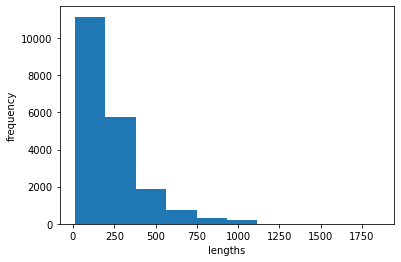

In [7]:
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
train_seq = pad_sequences(train_input, maxlen=100)

print(train_seq.shape)

(20000, 100)


In [10]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [11]:
print(train_seq[0][-10:])

[  6   2  46   7  14  20  10  10 470 158]


In [12]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [13]:
val_seq = pad_sequences(val_input, maxlen=100)

In [14]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)

(20000, 100, 500)


In [16]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [17]:
print(np.sum(train_oh[0][0]))

1.0


In [18]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=20, batch_size=64,
                    validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
313/313 [==============================] - 45s 138ms/step - loss: 0.6984 - accuracy: 0.5138 - val_loss: 0.6967 - val_accuracy: 0.5070
Epoch 2/20
313/313 [==============================] - 43s 137ms/step - loss: 0.6918 - accuracy: 0.5292 - val_loss: 0.6910 - val_accuracy: 0.5198
Epoch 3/20
313/313 [==============================] - 41s 132ms/step - loss: 0.6859 - accuracy: 0.5479 - val_loss: 0.6847 - val_accuracy: 0.5482
Epoch 4/20
313/313 [==============================] - 41s 130ms/step - loss: 0.6757 - accuracy: 0.5786 - val_loss: 0.6678 - val_accuracy: 0.5974
Epoch 5/20
313/313 [==============================] - 43s 137ms/step - loss: 0.6438 - accuracy: 0.6395 - val_loss: 0.6263 - val_accuracy: 0.6634
Epoch 6/20
313/313 [==============================] - 43s 137ms/step - loss: 0.6144 - accuracy: 0.6773 - val_loss: 0.6058 - val_accuracy: 0.6924
Epoch 7/20
313/313 [==============================] - 42s 135ms/step - loss: 0.5946 - accuracy: 0.6973 - val_loss: 0.5888 - val_ac

In [21]:
mode12 = keras.Sequential()

mode12.add(keras.layers.Embedding(500, 16, input_length=100))
mode12.add(keras.layers.SimpleRNN(8))
mode12.add(keras.layers.Dense(1, activation='sigmoid'))

mode12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [22]:
mode12 = keras.Sequential()

mode12.add(keras.layers.Embedding(500, 16, input_length=100))
mode12.add(keras.layers.LSTM(8))
mode12.add(keras.layers.Dense(1, activation='sigmoid'))

mode12.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [23]:
mode12 = keras.Sequential()

mode12.add(keras.layers.Embedding(500, 16, input_length=100))
mode12.add(keras.layers.LSTM(8, dropout=0.3))
mode12.add(keras.layers.Dense(1, activation='sigmoid'))

mode12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [24]:
mode12 = keras.Sequential()

mode12.add(keras.layers.Embedding(500, 16, input_length=100))
mode12.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
mode12.add(keras.layers.LSTM(8, dropout=0.3))
mode12.add(keras.layers.Dense(1, activation='sigmoid'))

mode12.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
mode12 = keras.Sequential()

mode12.add(keras.layers.Embedding(500, 16, input_length=100))
mode12.add(keras.layers.GRU(8))
mode12.add(keras.layers.Dense(1, activation='sigmoid'))

mode12.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
